# Removing the metadata from the image

This notebook shows how the bar with the metadata at the bottom of the SEM images is removed.

In [1]:
from carde.image_processing import preprocess_images
from skimage.io import imread
import SimpleITK as sitk
import stackview
import numpy as np
import carde

## Load an example image

In [2]:
image = imread(carde.io.local_data_path / "21-22/Original SEM Images/WD6mm_21.tif")

[[127 135 133 ... 139 136 136]
 [130 127 128 ... 131 127 132]
 [128 122 123 ... 128 125 124]
 ...
 [  0   0   0 ...   0  97 100]
 [107 108 112 ...  96  95  99]
 [108 110 108 ... 102 103 106]]
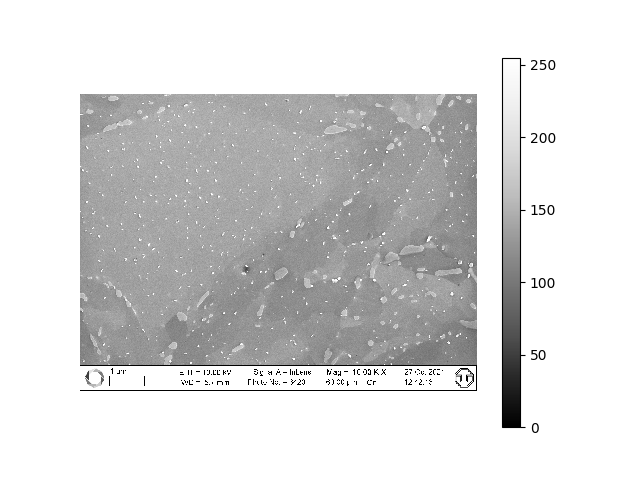
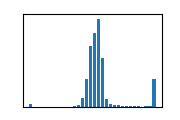

In [3]:
stackview.insight(image)

## Create a mask that captures the metadata area

### Get all objects that have at least an area corresponding to 10 lines in the image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
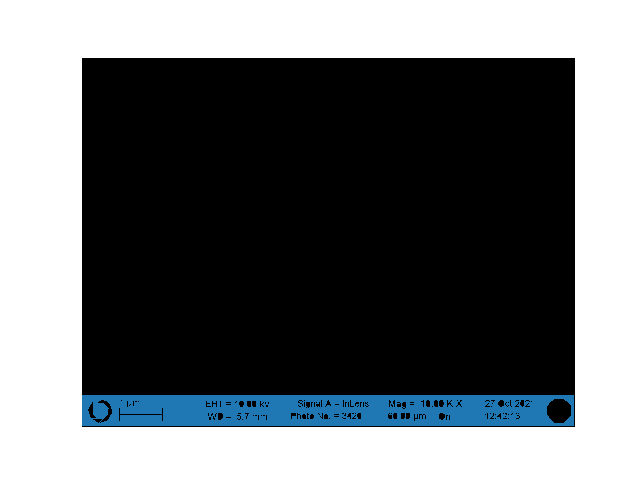

In [4]:
mask = sitk.OtsuThreshold(sitk.GetImageFromArray(image), 0, 1)
mask = sitk.ConnectedComponent(mask)
mask = sitk.RelabelComponent(mask, minimumObjectSize=10*image.shape[1])

stackview.insight(sitk.GetArrayViewFromImage(mask))

### Get the largest object in the mask

In [5]:
label_stats = sitk.LabelShapeStatisticsImageFilter()
label_stats.Execute(mask)

largest_label = 0
largest_label_size = 0
for label in label_stats.GetLabels():
    if label_stats.GetNumberOfPixels(label) > largest_label_size:
        largest_label = label
        largest_label_size = label_stats.GetNumberOfPixels(label)
largest_label

1

In [6]:
label_stats.GetNumberOfPixels(largest_label)

228711

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
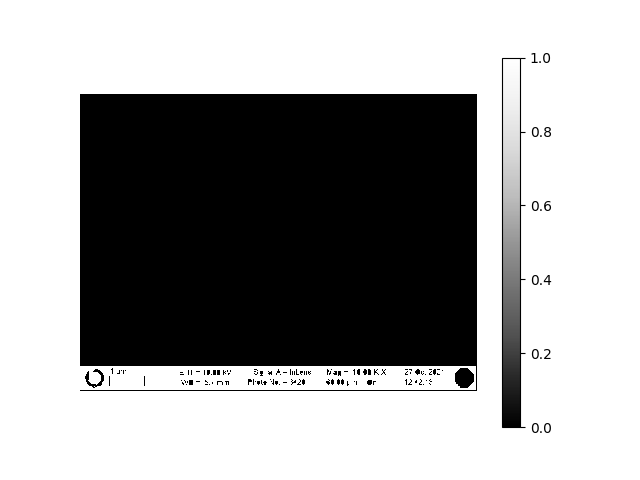
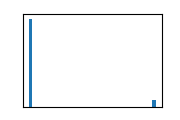

In [7]:
mask = sitk.BinaryThreshold(mask, largest_label, largest_label, 1, 0)

stackview.insight(sitk.GetArrayViewFromImage(mask))

### Get the last line of the image above the mask

There is a black frame around the metadata bar that is not covered by the mask. Therefore, crop away 3 additional lines to be sure no artifacts are left. 

In [8]:
mask = sitk.GetArrayFromImage(mask)
last_line = min(np.where(mask)[0]) - 2
last_line

np.int64(1403)

### Check the cropped image

[[127 135 133 ... 139 136 136]
 [130 127 128 ... 131 127 132]
 [128 122 123 ... 128 125 124]
 ...
 [112 107 111 ... 109 100  99]
 [108 115 111 ... 102  96 103]
 [111 117 112 ... 105 106 109]]
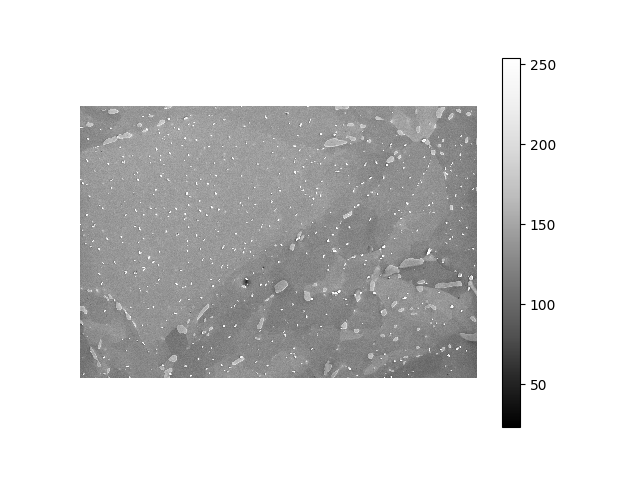
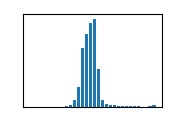

In [9]:
cropped_image = image[:last_line, :]
stackview.insight(cropped_image)

### Check if there are any artifacts left at the bottom of the cropped image

[[112 116 118 ...  98 101 102]
 [106 114 117 ...  95 100  98]
 [116 118 115 ...  93  91 103]
 ...
 [112 109 113 ... 109 100  99]
 [111 114 118 ... 102  96 103]
 [113 114 109 ... 105 106 109]]
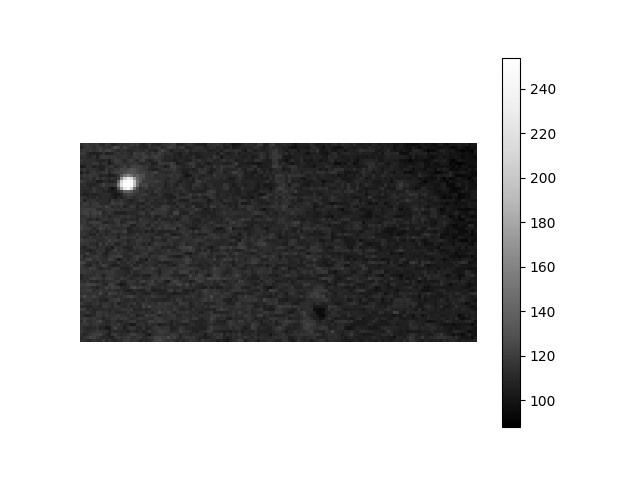
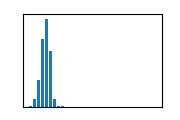

In [10]:
stackview.insight(cropped_image[-64:, -128:])

## Process all images in the dataset

In [11]:
preprocess_images()

Preprocessed WD_06mm_001.tif
Preprocessed WD_06mm_002.tif
Preprocessed WD_06mm_003.tif
Preprocessed WD_06mm_004.tif
Preprocessed WD_06mm_011.tif
Preprocessed WD_06mm_012.tif
Preprocessed WD6mm_21.tif
Preprocessed WD6mm_22.tif
Preprocessed WD_06mm_013.tif
Preprocessed WD_06mm_014.tif
Preprocessed WD6mm_23.tif
Preprocessed WD6mm_24.tif
Preprocessed WD6mm_27.tif
Preprocessed WD6mm_28.tif
Preprocessed WD_06mm_009.tif
Preprocessed WD_06mm_010.tif
Preprocessed WD_06mm_005.tif
Preprocessed WD_06mm_006.tif
Preprocessed WD6mm_25.tif
Preprocessed WD6mm_26.tif
Preprocessed WD6mm_47.tif
Preprocessed WD6mm_48.tif
Preprocessed WD_06mm_015.tif
Preprocessed WD_06mm_016.tif
Preprocessed WD_06mm_007.tif
Preprocessed WD_06mm_008.tif


### Check an example processed image for artifacts

[[112 116 118 ...  98 101 102]
 [106 114 117 ...  95 100  98]
 [116 118 115 ...  93  91 103]
 ...
 [112 109 113 ... 109 100  99]
 [111 114 118 ... 102  96 103]
 [113 114 109 ... 105 106 109]]
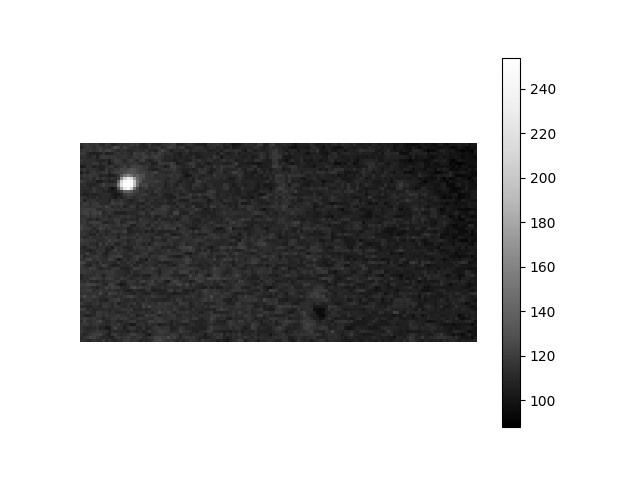
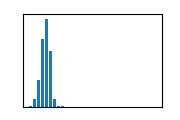

In [12]:
cropped_image = imread(carde.io.local_data_path / "preprocessed/images/WD6mm_21.tif")
stackview.insight(cropped_image[-64:, -128:])

## Process all images in the holdout set

In [13]:
holdout_data_path = carde.io.local_data_path / "ANP_3"
preprocessed_holdout_path = carde.io.preprocessed_image_path / "hold-out"
preprocess_images(
    data_path=holdout_data_path, target_image_path=preprocessed_holdout_path, target_label_path=preprocessed_holdout_path
)

Preprocessed WD6mm_36.tif
Preprocessed WD6mm_35.tif
Preprocessed WD6mm_31.tif
Preprocessed WD6mm_32.tif
Preprocessed WD6mm_33.tif
Preprocessed WD6mm_34.tif
Preprocessed WD6mm_40.tif
Preprocessed WD6mm_39.tif
Preprocessed WD6mm_37.tif
Preprocessed WD6mm_38.tif


### Check an example processed holdout image for artifacts

[[164 160 161 ... 122 125 127]
 [170 168 162 ... 128 133 124]
 [164 161 163 ... 129 127 123]
 ...
 [ 98  99 101 ... 142 133 136]
 [105 107 105 ... 138 132 131]
 [108 104 107 ... 135 131 131]]
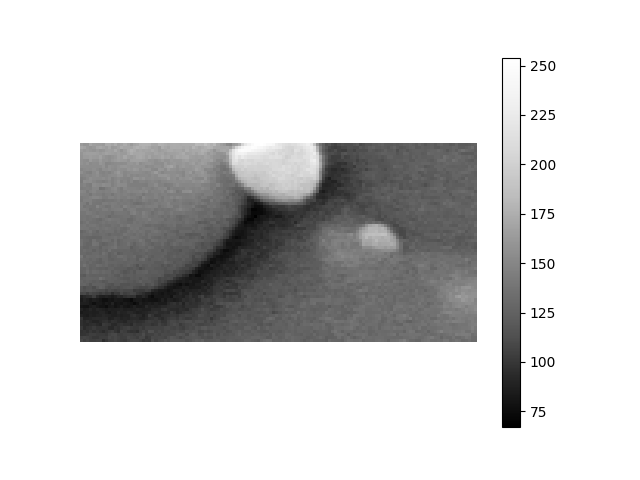
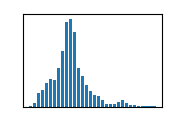

In [14]:
cropped_image = imread(carde.io.preprocessed_image_path / "hold-out"/ "WD6mm_32.tif")
stackview.insight(cropped_image[-64:, -128:])